In [1]:
from townsnet.models.region import Region

region = Region.from_pickle('data/region.pickle')

In [2]:
region.get_towns_gdf().head()

,town_name,population,geometry,capacity_cafe,capacity_kindergarten,capacity_school,capacity_bus_stop,capacity_parking,capacity_beauty,capacity_convenience,...,capacity_fitness,capacity_health_center,capacity_park,capacity_pharmacy,capacity_playground,capacity_police,capacity_houseware,capacity_sports_hall,settlement_name,district_name
id,,,,,,,,,,,,,,,,,,,,,
0,Болото,111,POINT (543142.339 6580637.744),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Борское сельское поселение,Бокситогорский муниципальный район
1,Большой Остров,116,POINT (544532.929 6593228.214),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Борское сельское поселение,Бокситогорский муниципальный район
2,Бор,116,POINT (544895.402 6593052.876),250.0,250.0,250.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Борское сельское поселение,Бокситогорский муниципальный район
3,Бороватое,114,POINT (543993.111 6589582.121),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Борское сельское поселение,Бокситогорский муниципальный район
4,Бочево,108,POINT (538540.110 6576793.684),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Борское сельское поселение,Бокситогорский муниципальный район


In [3]:
from townsnet.method.provision import Provision

prov = Provision(region=region)

In [4]:
prov_gdf, links_gdf = prov.calculate('school', self_supply=True)

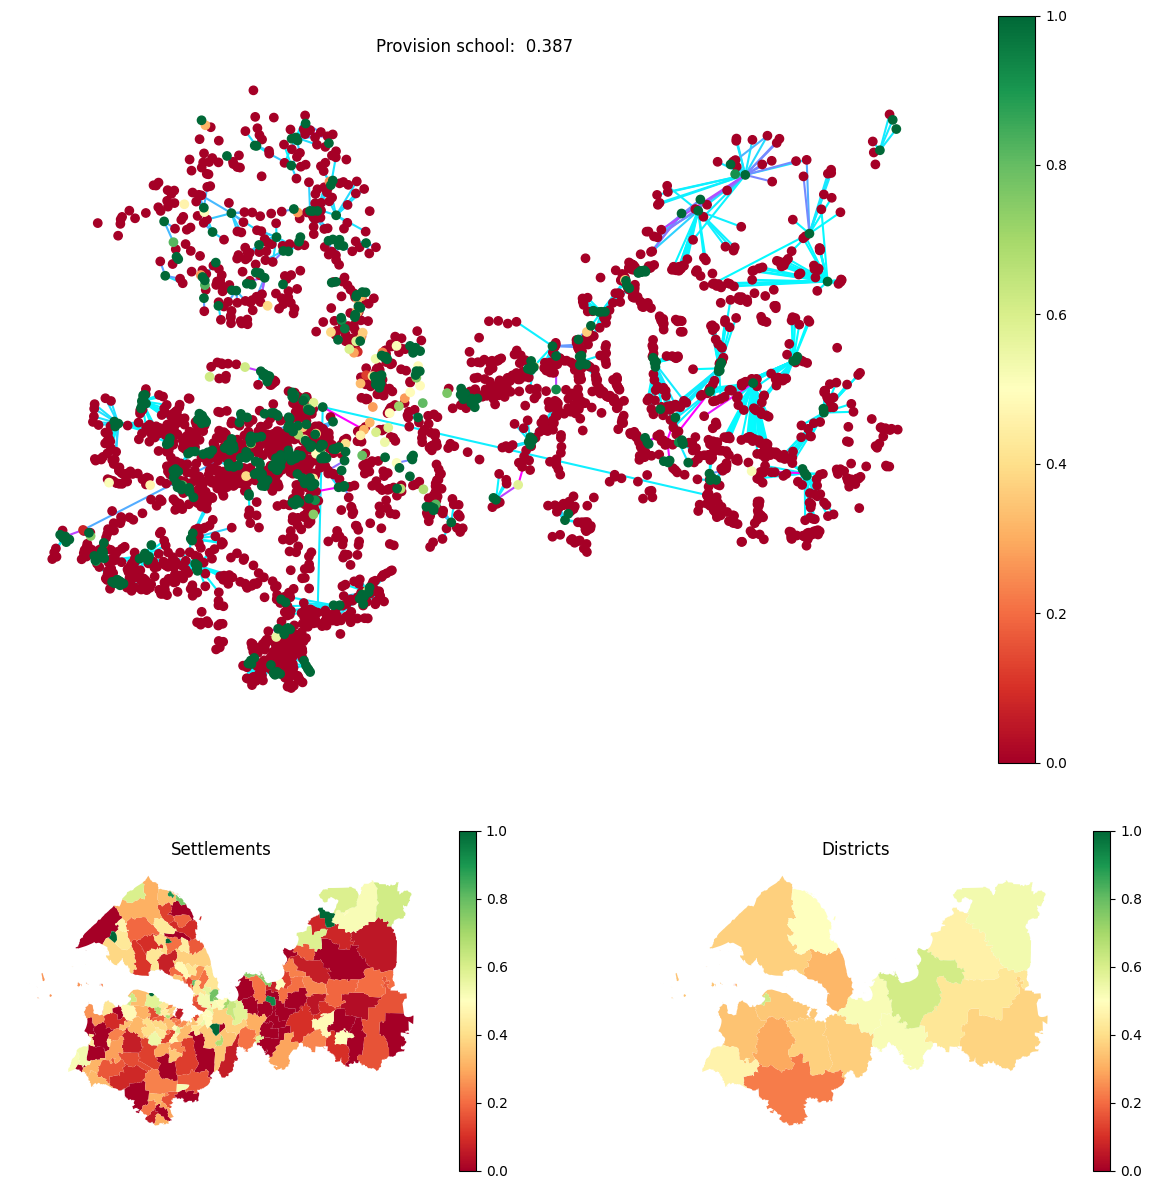

In [5]:
prov.plot('school',prov_gdf, links_gdf)

## Territory provision

In [9]:
import geopandas as gpd

territory_gdf = gpd.read_file('data/territories/lodey.geojson').to_crs(region.crs)

In [29]:
terr_gdf, terr_prov  = prov.territory_provision('school', territory_gdf, prov_gdf)
outer_gdf = prov_gdf.sjoin_nearest(terr_gdf[['geometry']], distance_col='distance', max_distance=terr_gdf.iloc[0].loc['buffer_meters']*2)

In [51]:
cx.providers.OpenStreetMap

{'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.Mapnik'},
 'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.DE'},
 'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'bounds': [[45, 5], [48, 11]],
  'name': 'OpenStreetMap.CH'},
 'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
  'max_zoom': 20,
  'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.France'},
 'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
  'name': 'OpenStreetMap.HOT'},
 'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
  'bounds': [[46.2, -5.5], [50, 0.7]],
  'name': 'OpenStreetMap.BZH'},
 'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'attribution': '(C) OpenStreetMap contributors',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'name': 'OpenStreetMap.BlackAndWhite'}}

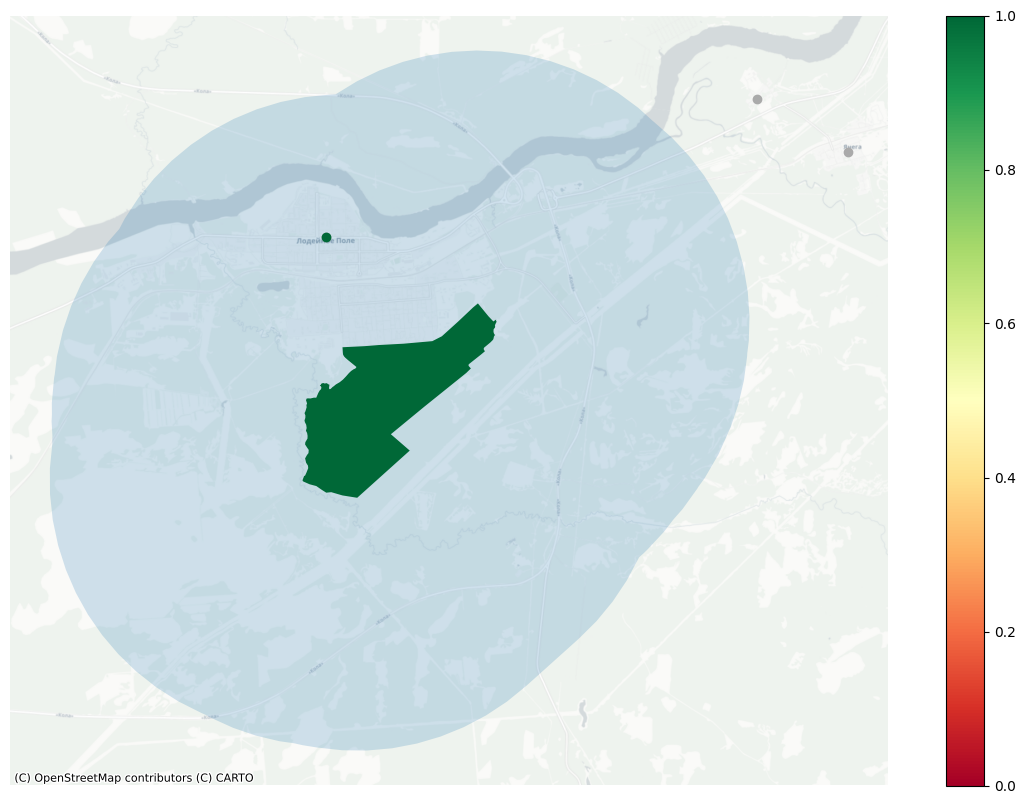

In [56]:
import contextily as cx

buffer = terr_gdf[['geometry']].copy()
buffer.geometry = buffer.buffer(terr_gdf.iloc[0].loc['buffer_meters'])
ax = buffer.plot(figsize=(15,10), alpha=0.1)
terr_gdf.plot(ax=ax, column='provision', cmap='RdYlGn', vmin=0, vmax=1, legend=True)
outer_gdf.plot(ax=ax, color='#aaa')
terr_prov.plot(ax=ax, column='provision', cmap='RdYlGn', vmin=0, vmax=1)
cx.add_basemap(ax, crs=region.crs, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()